## Softmax

In [ ]:
import numpy as np

In [ ]:
vector = np.array([11231, 999, 123142])
vector

In [ ]:
vector = np.array([-10, 10, 24])

In [ ]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [ ]:
softmax(vector)

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

https://dumps.wikimedia.org/zhwiki/ 这个网站下去找最新的，但是下载速度确实非常…非常慢，下了一整天


## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

### 提取：
* 下载并解压缩
* 在解压后的文件夹运行cmd
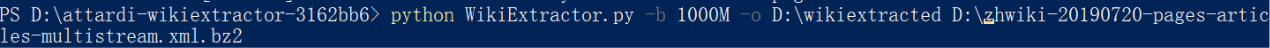
参数 -b 1000M 表示以 1000M 为单位切分文件，默认是 500K。把参数设置的大一些可以保证最后的抽取结果全部存在一个文件里；-o是存储位置；最后一项是input，要指明绝对路径  （参考http://licstar.net/archives/262 和 https://blog.csdn.net/sinat_29957455/article/details/81432846 ）
* 最后接近1G，分成了两个文件（这两个文件就是`txt`文件，打开之后发现wiki上有很多繁体，接着进入下一步繁简转换）

### 繁简转换：
* 很多中文博客都说用opencc
* 这里用hanzicov 更简单

In [ ]:
from hanziconv import HanziConv
filename = "D:\wikiextracted\AA\wiki_00.txt"
for line in open(filename, encoding="utf-8"):
    print(HanziConv.toSimplified(line))

In [ ]:
from hanziconv import HanziConv

filename = "D:\wikiextracted\AA\wiki_00.txt"
with open(filename, "r", encoding="utf-8"):
    open("D:\wikiextracted\AA\wiki_00_simp.txt","a", encoding="utf-8").write(HanziConv.toSimplified(line)+"\n")

with open("D:\wikiextracted\AA\wiki_01.txt", "r", encoding="utf-8"):
    open("D:\wikiextracted\AA\wiki_01_simp.txt","a", encoding="utf-8").write(HanziConv.toSimplified(line)+"\n")

* 去除标点 空行 < xxx >之类的

zhon库：https://blog.csdn.net/spring_willow/article/details/80211243#%E4%BA%8C%E4%B8%AD%E6%96%87%E6%96%87%E6%9C%AC%E5%8E%BB%E9%99%A4%E6%A0%87%E7%82%B9%E7%AC%A6%E5%8F%B7

re.sub用法：https://www.cnblogs.com/sshcy/p/8065113.html
<br>re.sub(pattern, repl, string, count=0, flags=0)
<br>re.sub(正则表达式查找,替换为,文本)

In [2]:
import jieba
import re
from zhon.hanzi import punctuation
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models.word2vec import PathLineSentences

D:\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
# 写入一个文件夹下的几个txt，便于后面 PathLineSentences处理
with open("D:\wikiextracted\AA\wiki_00_simp.txt","r", encoding="utf-8") as f, open("D:/wikiextracted/AA/tokens/tokens_test_0.txt" ,"w",encoding="utf-8") as fout:
    for line in f:
        if line==[]: continue
        s = line.strip().replace("\s","")
        s_n_punc = re.sub(r"[%s]+" % punctuation, "", s)
        s = re.sub(r"<.*>" , "", s_n_punc)
        fout.write(" ".join(jieba.lcut(s)))

In [ ]:
with open("D:\wikiextracted\AA\wiki_01_simp.txt","r", encoding="utf-8") as f, open("D:/wikiextracted/AA/tokens/tokens_test.txt" ,"w",encoding="utf-8") as fout:
    for line in f:
        if line==[]: continue
        s = line.strip().replace("\s","")
        s_n_punc = re.sub(r"[%s]+" % punctuation, "", s)
        s = re.sub(r"<.*>" , "", s_n_punc)
        fout.write(" ".join(jieba.lcut(s)))

部分参考了https://github.com/Mikasathebest/NLP_learning/blob/master/Assignment_4.ipynb

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中（不然他会把句子作为词向量输入，word2vec输入文本的格式应该是 词[空格]词[空格]词）。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

再训练成词向量Model.

---

In [ ]:
sentences = PathLineSentences("D:/wikiextracted/AA/tokens") #定位到文件夹

In [ ]:
model = Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)
model.save("wiki_zh.model") #存储 因为什么？下次可以用

In [3]:
model = Word2Vec.load("wiki_zh.model") #加载
model.wv.vocab

D:\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


{'\ufeff贵州省': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb208>,
 '遵义市': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb2b0>,
 '第四': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb2e8>,
 '中学贵州省': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb320>,
 '中学': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb358>,
 '创立': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb390>,
 '于': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb3c8>,
 '1915': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb438>,
 '年现': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb470>,
 '位于': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb4a8>,
 '中华人民共和国': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb4e0>,
 '贵州省': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb518>,
 '红花岗区': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb550>,
 '石龙': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb588>,
 '路': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb5c0>,
 '有': <gensim.models.keyedvectors.Vocab at 0x18cd1fdb5f8>,
 '校区': <gensim.models.

* 就是说Word2Vec训练完之后，`model.wv.most_similar`("computer")这个命令会造成内存溢出

加载完模型之后，model.init_sims(replace = True)https://stackoverflow.com/questions/50478046/memory-error-when-using-gensim-for-loading-word2vec

In [ ]:
model.init_sims(replace = True)
model.wv.most_similar("computer")

In [ ]:
model.wv['知识']  # 查看词向量 numpy vector of a word

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [4]:
testwords = ['金融','涨','股票','跌','经济']
for i in range(5):
    res = model.wv.most_similar(testwords[i])
    print (testwords[i], res)

金融 [('金融服务', 0.8033967614173889), ('银行业', 0.8030401468276978), ('国际金融', 0.7920640110969543), ('保险业', 0.7770156860351562), ('信贷', 0.776636004447937), ('金融市场', 0.7668912410736084), ('投资银行', 0.7571296691894531), ('金融机构', 0.7553901672363281), ('风险管理', 0.7492480278015137), ('证券市场', 0.7452202439308167)]
涨 [('上涨', 0.7559868693351746), ('涨价', 0.7421480417251587), ('暴涨', 0.7318757772445679), ('勐涨', 0.7311961650848389), ('跌', 0.7286804914474487), ('飙升', 0.7203735113143921), ('米价', 0.7146720886230469), ('飞涨', 0.7040178775787354), ('压低', 0.6968806982040405), ('涨至', 0.6909187436103821)]
股票 [('公司股票', 0.871261715888977), ('股票交易', 0.8212127685546875), ('优先股', 0.8137478828430176), ('普通股', 0.8072182536125183), ('期货', 0.8027975559234619), ('证券', 0.8013162612915039), ('期权', 0.7967545986175537), ('股票市场', 0.7895160913467407), ('股价', 0.7826082706451416), ('债券', 0.7795796990394592)]
跌 [('滑落', 0.772079348564148), ('跌落', 0.7316106557846069), ('涨', 0.7286804914474487), ('跌至', 0.6979869604110718), ('回落', 0.697561

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


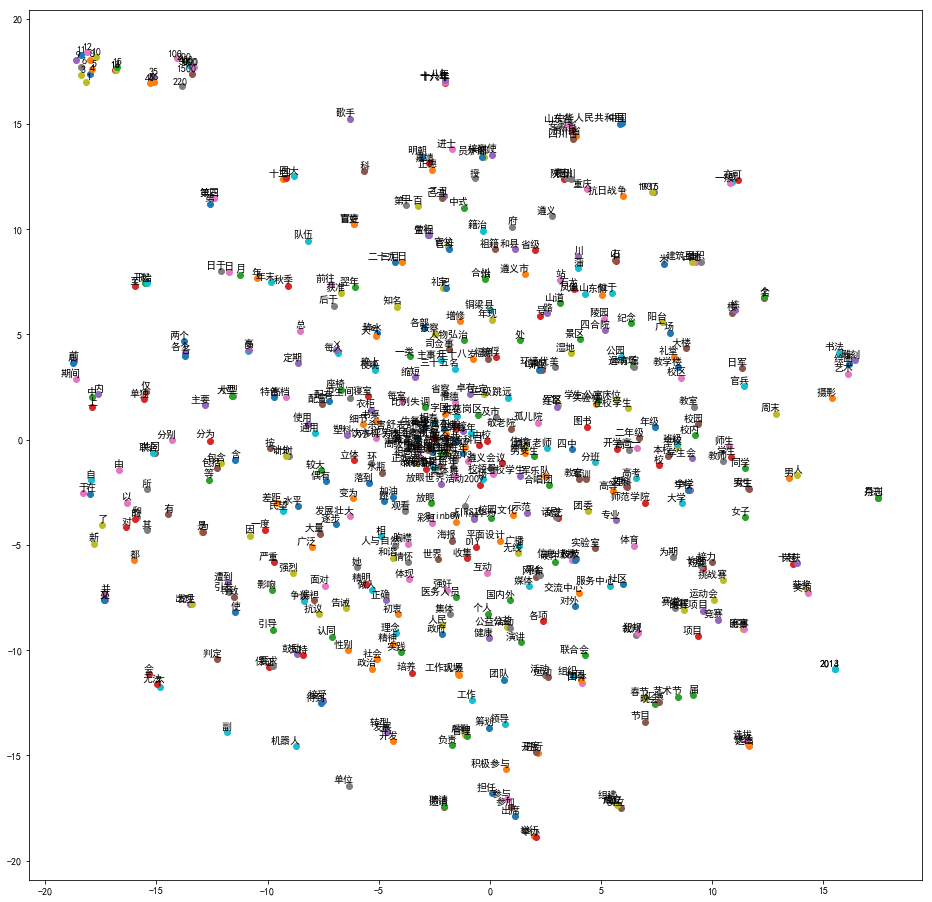

In [7]:
labels = []
tokens = [] #vectors
for i,word in enumerate(model.wv.vocab):
    if i > 500: break            #完全跑完RAM不够
    tokens.append(model[word])
    labels.append(word)
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()